<center><h1>Martinez_Henry_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from scipy.io import arff

Get the Vertebral Column Data Set

In [7]:
arff_file = arff.loadarff("../data/vertebral_column_data/column_2C_weka.arff")
df = pd.DataFrame(arff_file[0])
df["class"] = df["class"].str.decode("utf-8")
df.replace("Normal", 0, inplace=True)
df.replace("Abnormal", 1, inplace=True)
df

C:\Users\Henry\AppData\Local\Temp\ipykernel_20336\3713645303.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Abnormal", 1, inplace=True)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

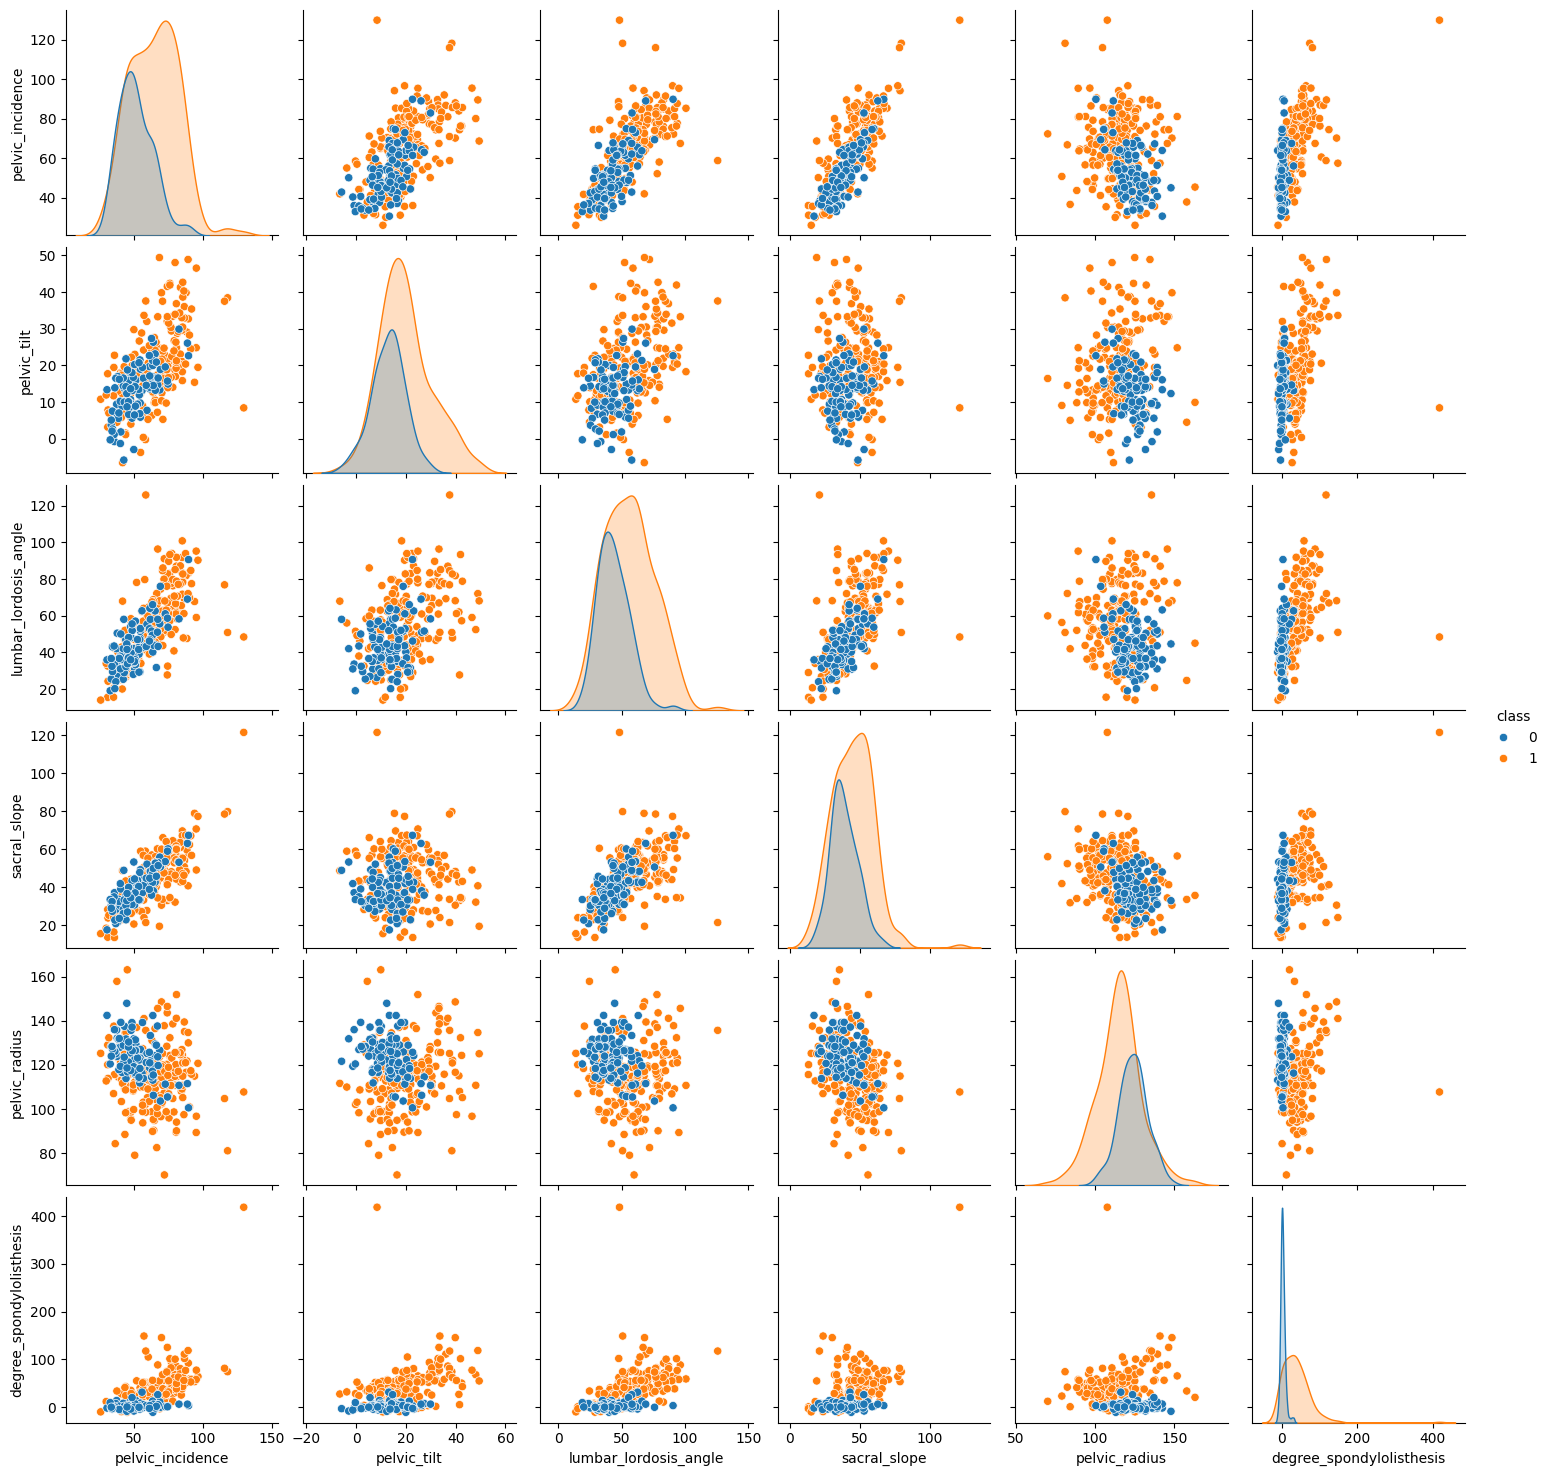

In [8]:
sns.pairplot(df, hue="class");
plt.show()

#### ii. Boxplots

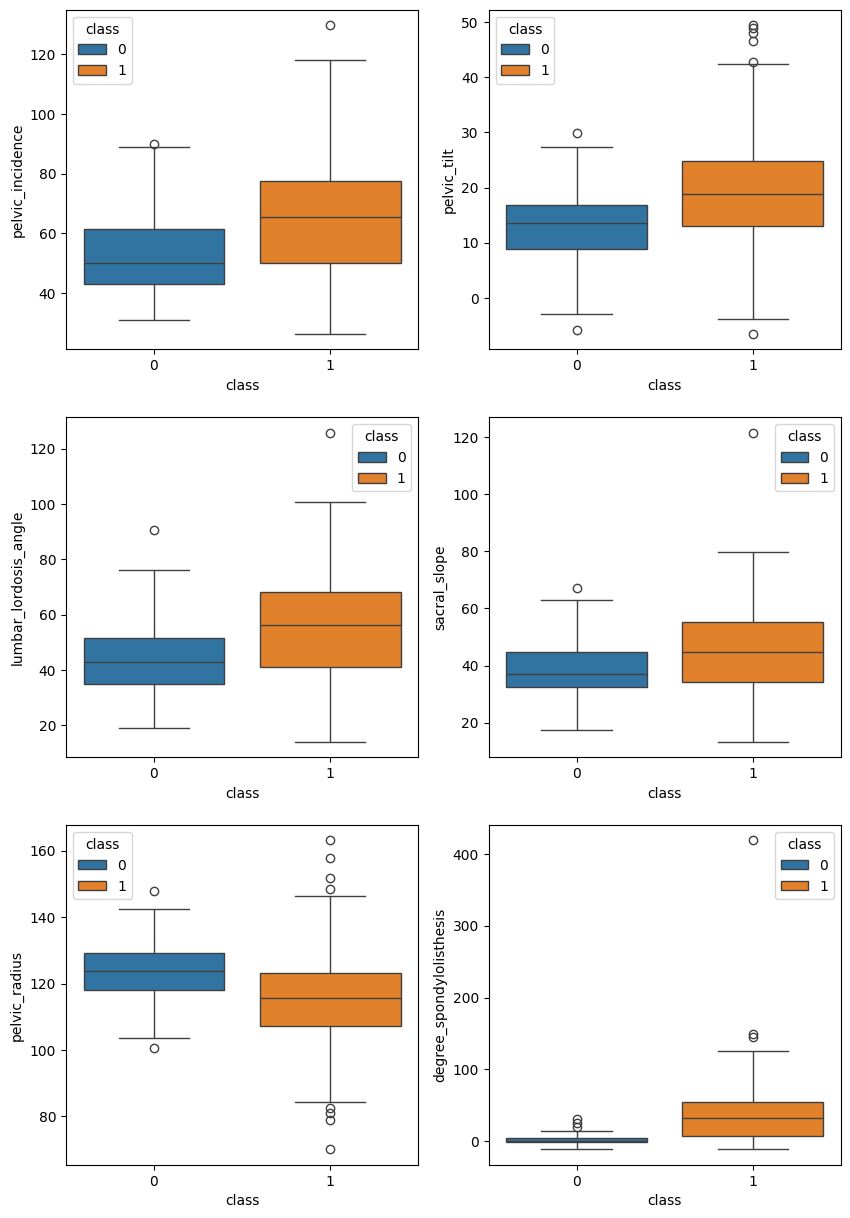

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

sns.boxplot(df, x="class", y="pelvic_incidence", hue="class", ax=axes[0, 0]);
sns.boxplot(df, x="class", y="pelvic_tilt", hue="class", ax=axes[0, 1]);
sns.boxplot(df, x="class", y="lumbar_lordosis_angle", hue="class", ax=axes[1, 0]);
sns.boxplot(df, x="class", y="sacral_slope", hue="class", ax=axes[1, 1]);
sns.boxplot(df, x="class", y="pelvic_radius", hue="class", ax=axes[2, 0]);
sns.boxplot(df, x="class", y="degree_spondylolisthesis", hue="class", ax=axes[2, 1]);

plt.show()

#### iii. Split Data Set

In [10]:
normal_tr = df[df["class"] == 0].iloc[0:70]
abnormal_tr = df[df["class"] == 1].iloc[0:140]

normal_te = df[df["class"] == 0].iloc[70:]
abnormal_te = df[df["class"] == 1].iloc[140:]

train_df = pd.concat([normal_tr, abnormal_tr])
test_df = pd.concat([normal_te, abnormal_te])

train_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


### (c) Classification

#### i. Euclidean Metric

In [11]:
x_train = train_df.drop("class", axis=1)
y_train = train_df["class"]
x_test = test_df.drop("class", axis=1)
y_test = test_df["class"]

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")


#### ii. Test Data

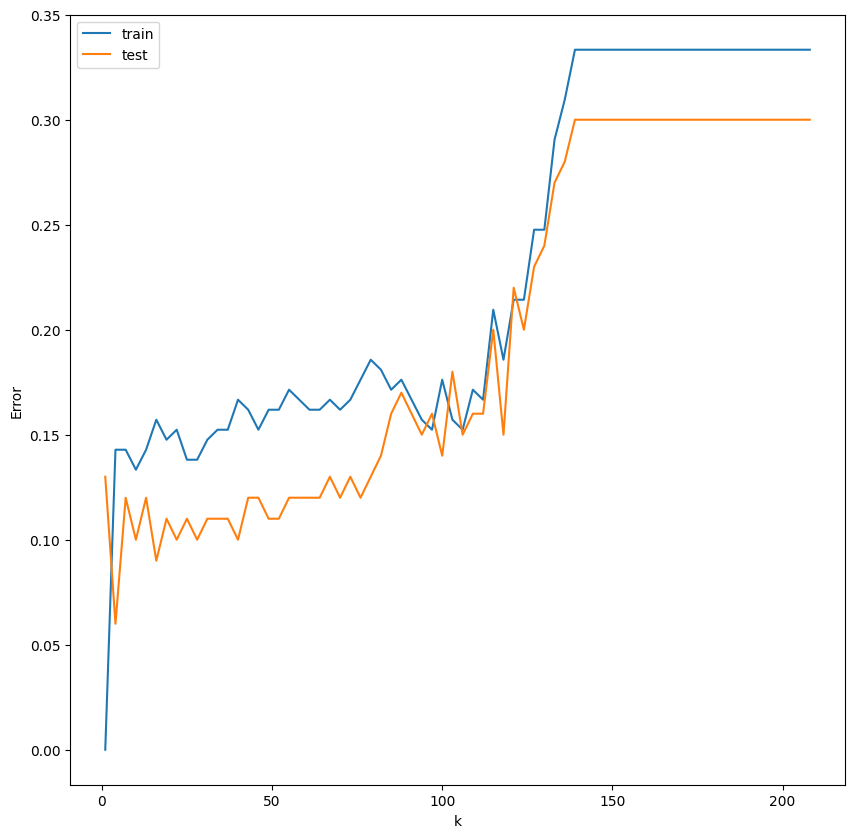

4 is the most suitable k among these values.

Evaluation Metrics for k*
-------------------------
Confusion: [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333334


In [12]:
k_values = list(range(208, 0, -3))
# print(k_values)

train_errors, test_errors = [], []

best_error = float('inf')
best_k = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(x_train, y_train)

    train_prediction = knn.predict(x_train)
    train_error = 1 - accuracy_score(y_train, train_prediction)
    train_errors.append(train_error)

    test_prediction = knn.predict(x_test)
    test_error = 1 - accuracy_score(y_test, test_prediction)
    test_errors.append(test_error)
    # print(test_error)

    if test_error < best_error:
        best_error = test_error
        best_k = k
        # print(k)

plt.figure(figsize=(10,10))
sns.lineplot(x=k_values, y=train_errors, label="train")
sns.lineplot(x=k_values, y=test_errors, label="test")
plt.ylabel('Error')
plt.xlabel('k')
plt.legend()
plt.show()

print(f"{best_k} is the most suitable k among these values.\n")

knn = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

confusion = confusion_matrix(y_test, prediction)
true_positive_rate = recall_score(y_test, prediction)
true_negative_rate = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
precision = precision_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Evaluation Metrics for k*\n-------------------------")
print(f"Confusion: {confusion}")
print(f"True Positive Rate: {true_positive_rate}")
print(f"True Negative Rate: {true_negative_rate}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")

#### iii. Learning Curve

6


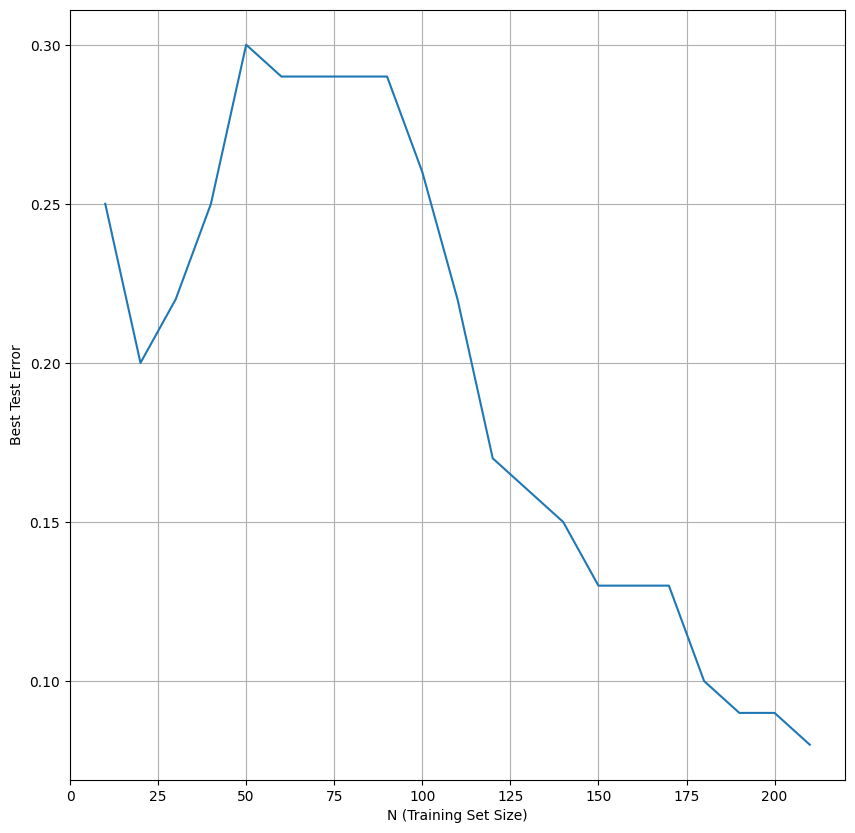

For N=10, the optimal k is 1
For N=20, the optimal k is 6
For N=30, the optimal k is 1
For N=40, the optimal k is 11
For N=50, the optimal k is 26
For N=60, the optimal k is 21
For N=70, the optimal k is 26
For N=80, the optimal k is 31
For N=90, the optimal k is 41
For N=100, the optimal k is 6
For N=110, the optimal k is 6
For N=120, the optimal k is 16
For N=130, the optimal k is 16
For N=140, the optimal k is 16
For N=150, the optimal k is 16
For N=160, the optimal k is 6
For N=170, the optimal k is 6
For N=180, the optimal k is 6
For N=190, the optimal k is 6
For N=200, the optimal k is 6
For N=210, the optimal k is 6


In [13]:
n_arr = list(range(10, 211, 10))
# print(training_set)

best_test_errors = []
k_values = []

for n in n_arr:
    n0 = n // 3
    n1 = n - n0

    train_normal_sub = normal_tr.iloc[:n0]
    train_abnormal_sub = abnormal_tr.iloc[:n1]

    training_sub = pd.concat([train_normal_sub, train_abnormal_sub])

    best_error = float('inf')
    best_k = 0

    for k in range(1, n, 5):
        knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        knn.fit(training_sub.drop("class", axis=1), training_sub["class"])

        prediction = knn.predict(x_test)
        test_error = 1 - accuracy_score(y_test, prediction)

        if test_error < best_error:
            best_error = test_error
            best_k = k

    best_test_errors.append(best_error)
    k_values.append(best_k)
print(best_k)

plt.figure(figsize=(10, 10))
plt.plot(n_arr, best_test_errors)
plt.xlabel("N (Training Set Size)")
plt.ylabel("Best Test Error")
plt.grid(True)
plt.show()

for n, k in zip(n_arr, k_values):
    print(f"For N={n}, the optimal k is {k}")

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [14]:
k_values = list(range(1, 197, 5))
best_k = 0
best_error = float('inf')

results = []

# best_test_errors = []
# stored_k_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan", p=1)
    knn.fit(train_df.drop("class", axis=1), train_df["class"])

    prediction = knn.predict(x_test)
    test_error = 1 - accuracy_score(y_test, prediction)

    if test_error < best_error:
        best_error = test_error
        best_k = k

    results.append({
        'Distance Metric': 'Manhattan (p=1)',
        'k': k,
        'Test Error': test_error
    })

    # best_test_errors.append(test_error)
    # stored_k_values.append(k)

# for error, k_value in zip(best_test_errors, stored_k_values):
#     print(f"For k={k_value}, the test error rate is {error:.2f}")

summary_df = pd.DataFrame(results)
print(summary_df)

print(f"\nThe best k for the Manhattan Distance metric is {best_k}")

    Distance Metric    k  Test Error
0   Manhattan (p=1)    1        0.11
1   Manhattan (p=1)    6        0.11
2   Manhattan (p=1)   11        0.11
3   Manhattan (p=1)   16        0.12
4   Manhattan (p=1)   21        0.12
5   Manhattan (p=1)   26        0.11
6   Manhattan (p=1)   31        0.12
7   Manhattan (p=1)   36        0.13
8   Manhattan (p=1)   41        0.13
9   Manhattan (p=1)   46        0.13
10  Manhattan (p=1)   51        0.14
11  Manhattan (p=1)   56        0.13
12  Manhattan (p=1)   61        0.15
13  Manhattan (p=1)   66        0.15
14  Manhattan (p=1)   71        0.14
15  Manhattan (p=1)   76        0.14
16  Manhattan (p=1)   81        0.16
17  Manhattan (p=1)   86        0.15
18  Manhattan (p=1)   91        0.20
19  Manhattan (p=1)   96        0.20
20  Manhattan (p=1)  101        0.22
21  Manhattan (p=1)  106        0.21
22  Manhattan (p=1)  111        0.23
23  Manhattan (p=1)  116        0.21
24  Manhattan (p=1)  121        0.22
25  Manhattan (p=1)  126        0.24
2

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [15]:
log_p_values = np.arange(0.1, 1.1, 0.1)

best_log10_p = 0
best_error = float('inf')

results = []

# best_test_errors = []
# stored_log10_ps = []

k_manhattan = best_k

for log10_p in log_p_values:
    p = 10 ** log10_p

    knn = KNeighborsClassifier(n_neighbors=k_manhattan, p=p)
    knn.fit(train_df.drop("class", axis=1), train_df["class"])

    prediction = knn.predict(x_test)

    test_error = 1 - accuracy_score(y_test, prediction)

    if test_error < best_error:
        best_error = test_error
        best_log10_p = log10_p

    results.append({
        'Distance Metric': f'Minkowski (log10(p)={log10_p:.1f})',
        'log10(p)': log10_p,
        'Test Error': test_error
    })

    # best_test_errors.append(test_error)
    # stored_log10_ps.append(log10_p)

# for error, log10_p in zip(best_test_errors, stored_log10_ps):
#     print(f"For log10(p)={log10_p:.2f}, the test error rate is {error:.2f}")

summary_df = pd.DataFrame(results)
print(summary_df)

print(f"\nThe best log_10(p) for the Minkowski Distance metric is {best_log10_p:.2f}")

            Distance Metric  log10(p)  Test Error
0  Minkowski (log10(p)=0.1)       0.1        0.13
1  Minkowski (log10(p)=0.2)       0.2        0.13
2  Minkowski (log10(p)=0.3)       0.3        0.13
3  Minkowski (log10(p)=0.4)       0.4        0.14
4  Minkowski (log10(p)=0.5)       0.5        0.14
5  Minkowski (log10(p)=0.6)       0.6        0.12
6  Minkowski (log10(p)=0.7)       0.7        0.11
7  Minkowski (log10(p)=0.8)       0.8        0.11
8  Minkowski (log10(p)=0.9)       0.9        0.11
9  Minkowski (log10(p)=1.0)       1.0        0.11

The best log_10(p) for the Minkowski Distance metric is 0.70


##### C. Chebyshev Distance With p -> infinity.

In [16]:
k_values = list(range(1, 197, 5))

best_k = 0
best_error = float('inf')

results = []

# best_test_errors = []
# stored_k_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=float('inf'))
    knn.fit(train_df.drop("class", axis=1), train_df["class"])

    prediction = knn.predict(x_test)

    test_error = 1 - accuracy_score(y_test, prediction)

    if test_error < best_error:
        best_error = test_error
        best_k = k

    results.append({
        'Distance Metric': 'Chebyshev (p to inf)',
        'k': k,
        'Test Error': test_error
    })

    # best_test_errors.append(test_error)
    # stored_k_values.append(k)

# for error, stored_k in zip(best_test_errors, stored_k_values):
#     print(f"For k={stored_k}, the test error rate is {error:.2f}")

summary_df = pd.DataFrame(results)
print(summary_df)

print(f"\nThe best k for the Chebyshev Distance metric is {best_k}")

         Distance Metric    k  Test Error
0   Chebyshev (p to inf)    1        0.13
1   Chebyshev (p to inf)    6        0.10
2   Chebyshev (p to inf)   11        0.12
3   Chebyshev (p to inf)   16        0.08
4   Chebyshev (p to inf)   21        0.11
5   Chebyshev (p to inf)   26        0.12
6   Chebyshev (p to inf)   31        0.12
7   Chebyshev (p to inf)   36        0.10
8   Chebyshev (p to inf)   41        0.13
9   Chebyshev (p to inf)   46        0.12
10  Chebyshev (p to inf)   51        0.12
11  Chebyshev (p to inf)   56        0.12
12  Chebyshev (p to inf)   61        0.14
13  Chebyshev (p to inf)   66        0.13
14  Chebyshev (p to inf)   71        0.14
15  Chebyshev (p to inf)   76        0.11
16  Chebyshev (p to inf)   81        0.14
17  Chebyshev (p to inf)   86        0.12
18  Chebyshev (p to inf)   91        0.15
19  Chebyshev (p to inf)   96        0.14
20  Chebyshev (p to inf)  101        0.19
21  Chebyshev (p to inf)  106        0.18
22  Chebyshev (p to inf)  111     

#### ii. Mahalanobis Distance.

In [17]:
k_values = list(range(1, 197, 5))

best_k = 0
best_error = float('inf')

results = []

# best_test_errors = []
# stored_k_values = []

inverse_covariance_matrix = np.linalg.pinv(train_df.drop('class', axis=1).cov())

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI': inverse_covariance_matrix})
    knn.fit(train_df.drop("class", axis=1), train_df["class"])

    prediction = knn.predict(x_test)

    test_error = 1 - accuracy_score(y_test, prediction)

    if test_error < best_error:
        best_error = test_error
        best_k = k

    results.append({
        'Distance Metric': 'Mahalanobis',
        'k': k,
        'Test Error': test_error
    })

    if best_k == 1:
        best_k = 6 # so it doesn't default to 1 and instead goes to the next best
    else:
        best_k = best_k

    # best_test_errors.append(test_error)
    # stored_k_values.append(k)

# for error, stored_k in zip(best_test_errors, stored_k_values):
#     print(f"For k={stored_k}, the test error rate is {error:.2f}")

summary_df = pd.DataFrame(results)
print(summary_df)

print(f"\nThe best k for the Mahalanobis Distance metric is {best_k}")

   Distance Metric    k  Test Error
0      Mahalanobis    1        0.15
1      Mahalanobis    6        0.16
2      Mahalanobis   11        0.18
3      Mahalanobis   16        0.17
4      Mahalanobis   21        0.20
5      Mahalanobis   26        0.17
6      Mahalanobis   31        0.21
7      Mahalanobis   36        0.21
8      Mahalanobis   41        0.19
9      Mahalanobis   46        0.22
10     Mahalanobis   51        0.21
11     Mahalanobis   56        0.21
12     Mahalanobis   61        0.23
13     Mahalanobis   66        0.21
14     Mahalanobis   71        0.22
15     Mahalanobis   76        0.21
16     Mahalanobis   81        0.24
17     Mahalanobis   86        0.21
18     Mahalanobis   91        0.24
19     Mahalanobis   96        0.24
20     Mahalanobis  101        0.24
21     Mahalanobis  106        0.23
22     Mahalanobis  111        0.25
23     Mahalanobis  116        0.26
24     Mahalanobis  121        0.29
25     Mahalanobis  126        0.29
26     Mahalanobis  131     

### (e) Weighted Decision

In [18]:
k_values = list(range(1, 197, 5))

results = []

for k in k_values:
    for metric_name, metric_value in [('Euclidean', 'euclidean'), ('Manhattan', 'manhattan'), ('Chebyshev', 'chebyshev')]:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric_value, weights="distance")
        knn.fit(train_df.drop("class", axis=1), train_df["class"])

        prediction = knn.predict(x_test)

        test_error = 1 - accuracy_score(y_test, prediction)

        results.append({
            'Distance Metric': metric_name,
            'k': k,
            'Test Error': test_error
        })

summary_df = pd.DataFrame(results)

minimum_errors = summary_df.groupby('Distance Metric')['Test Error'].min()
best_ks = summary_df.loc[summary_df.groupby('Distance Metric')['Test Error'].idxmin()]['k']

print(summary_df)

for metric_name, best_k, min_error in zip(minimum_errors.index, best_ks, minimum_errors):
    print(f"The best k for {metric_name} Distance is {best_k}, Minimum Test Error: {min_error:.4f}")

    Distance Metric    k  Test Error
0         Euclidean    1        0.13
1         Manhattan    1        0.11
2         Chebyshev    1        0.13
3         Euclidean    6        0.10
4         Manhattan    6        0.11
..              ...  ...         ...
115       Manhattan  191        0.28
116       Chebyshev  191        0.27
117       Euclidean  196        0.28
118       Manhattan  196        0.29
119       Chebyshev  196        0.28

[120 rows x 3 columns]
The best k for Chebyshev Distance is 16, Minimum Test Error: 0.1100
The best k for Euclidean Distance is 6, Minimum Test Error: 0.1000
The best k for Manhattan Distance is 26, Minimum Test Error: 0.1000


### (f) Training Error Rate

In [19]:
print("The lowest training error that was achieved in this homework was 0.00, as there shouldn't be an error when calculating against the training.\nThe lowest testing error was 0.10.")

The lowest training error that was achieved in this homework was 0.00, as there shouldn't be an error when calculating against the training.
The lowest testing error was 0.10.
